In [1]:
import mxnet as mx
import matplotlib.pyplot as plot
import cv2
import numpy as np
from mxnet.io import DataBatch
import time

/Users/vinrar/anaconda3/lib/python3.7/site-packages/mxnet/module/base_module.py:67: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['softmax_label'])
  warnings.warn(msg)


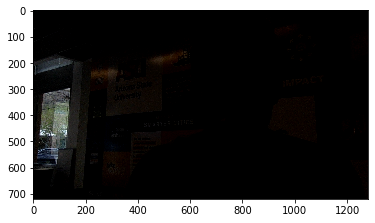

Total size of the features = 2
probability=0.982315, label=not_graffiti
probability=0.017685, label=graffiti
Total execution time: 0.11593508720397949 seconds


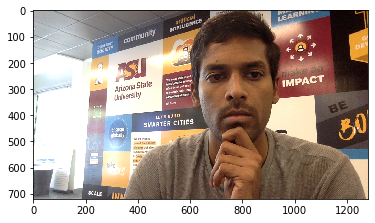

Total size of the features = 2
probability=0.945919, label=not_graffiti
probability=0.054081, label=graffiti
Total execution time: 0.12443017959594727 seconds


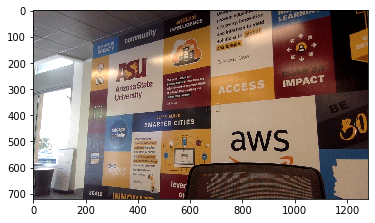

Total size of the features = 2
probability=0.810721, label=not_graffiti
probability=0.189279, label=graffiti
Total execution time: 0.11180710792541504 seconds


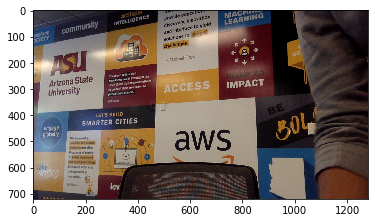

Total size of the features = 2
probability=0.901939, label=not_graffiti
probability=0.098061, label=graffiti
Total execution time: 0.1137399673461914 seconds


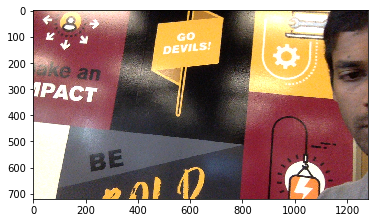

Total size of the features = 2
probability=0.618031, label=not_graffiti
probability=0.381969, label=graffiti
Total execution time: 0.1069498062133789 seconds


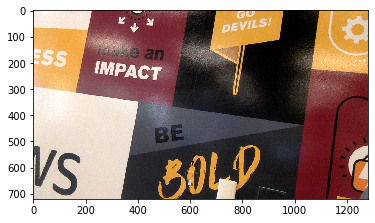

Total size of the features = 2
probability=0.782926, label=not_graffiti
probability=0.217074, label=graffiti
Total execution time: 0.14240217208862305 seconds


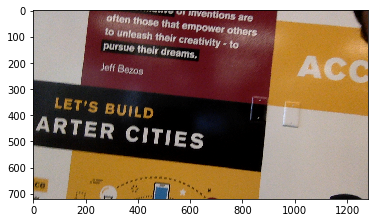

Total size of the features = 2
probability=0.916515, label=not_graffiti
probability=0.083485, label=graffiti
Total execution time: 0.12145400047302246 seconds


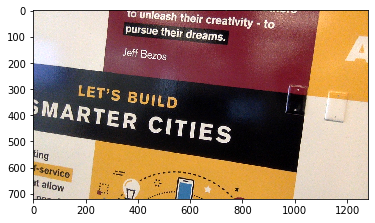

Total size of the features = 2
probability=0.876191, label=not_graffiti
probability=0.123809, label=graffiti
Total execution time: 0.12958216667175293 seconds


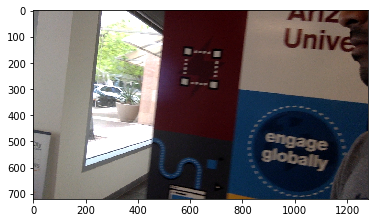

Total size of the features = 2
probability=0.875107, label=not_graffiti
probability=0.124893, label=graffiti
Total execution time: 0.1004190444946289 seconds


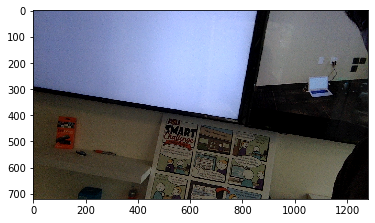

Total size of the features = 2
probability=0.868094, label=not_graffiti
probability=0.131906, label=graffiti
Total execution time: 0.10233402252197266 seconds


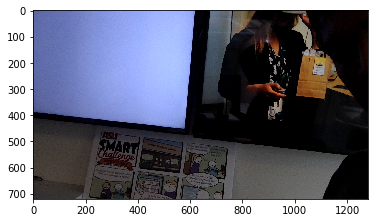

Total size of the features = 2
probability=0.942888, label=not_graffiti
probability=0.057112, label=graffiti
Total execution time: 0.10864591598510742 seconds


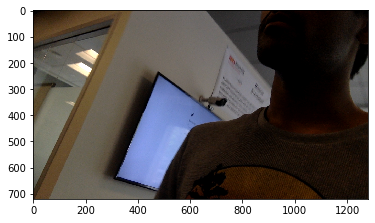

Total size of the features = 2
probability=0.754521, label=not_graffiti
probability=0.245479, label=graffiti
Total execution time: 0.09673714637756348 seconds


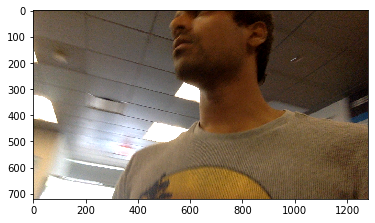

Total size of the features = 2
probability=0.723180, label=not_graffiti
probability=0.276821, label=graffiti
Total execution time: 0.12122297286987305 seconds


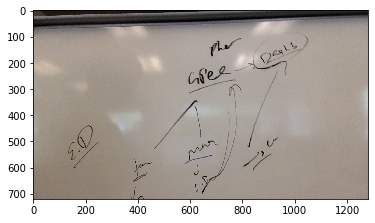

Total size of the features = 2
probability=0.899893, label=not_graffiti
probability=0.100107, label=graffiti
Total execution time: 0.1059718132019043 seconds


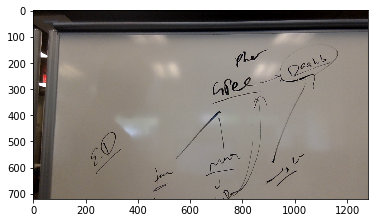

Total size of the features = 2
probability=0.690519, label=not_graffiti
probability=0.309481, label=graffiti
Total execution time: 0.1176450252532959 seconds


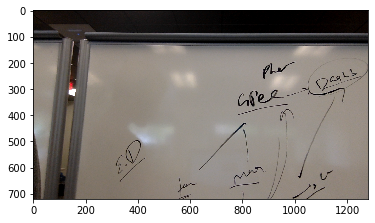

Total size of the features = 2
probability=0.865041, label=not_graffiti
probability=0.134959, label=graffiti
Total execution time: 0.11654806137084961 seconds


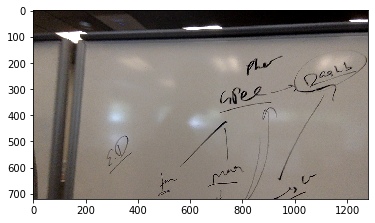

Total size of the features = 2
probability=0.844668, label=not_graffiti
probability=0.155332, label=graffiti
Total execution time: 0.11275386810302734 seconds


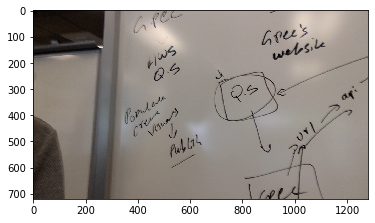

Total size of the features = 2
probability=0.732800, label=graffiti
probability=0.267200, label=not_graffiti
Total execution time: 0.10268592834472656 seconds


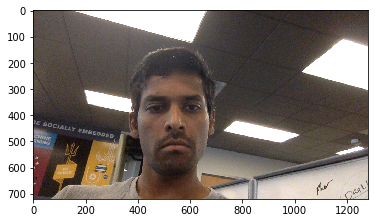

Total size of the features = 2
probability=0.972605, label=not_graffiti
probability=0.027395, label=graffiti
Total execution time: 0.12184906005859375 seconds


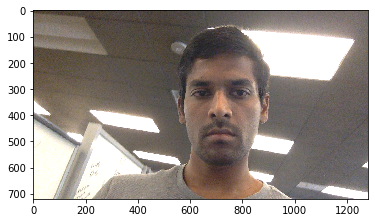

Total size of the features = 2
probability=0.655145, label=not_graffiti
probability=0.344855, label=graffiti
Total execution time: 0.1545248031616211 seconds


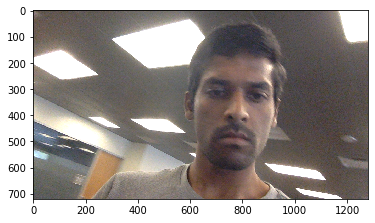

Total size of the features = 2
probability=0.742743, label=not_graffiti
probability=0.257257, label=graffiti
Total execution time: 0.09866595268249512 seconds


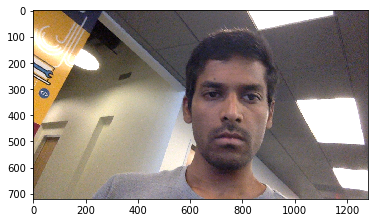

Total size of the features = 2
probability=0.750687, label=not_graffiti
probability=0.249313, label=graffiti
Total execution time: 0.11711382865905762 seconds


KeyboardInterrupt: 

In [2]:
net = mx.mod.Module.load('./image-classification', 8)
image_l = 256
image_w = 256
net.bind(for_training=False, data_shapes=[('data', (1, 3, image_l, image_w))], label_shapes=net._label_shapes)


def get_image(img, show=False):
    if img is None:
        return None
    if show:
        plot.imshow(img)
        plot.axis('off')
        plot.show()
    # convert into format (batch, RGB, width, height)
    img = cv2.resize(img, (256, 256))
    img = np.swapaxes(img, 0, 2)
    # cv2.imwrite('compressed.png', img)
    img = np.swapaxes(img, 1, 2)
    img = img[np.newaxis, :]
    return img


def predict(img, labels):
    start_time = time.time()

#     img = get_image(url, show=True)
    # compute the predict probabilities
    net.forward(DataBatch([mx.nd.array(img)]))
    # net.forward(list([mx.nd.array(img)]))
    prob = net.get_outputs()[0].asnumpy()

    # print the top-5
    prob = np.squeeze(prob)
    a = np.argsort(prob)[::-1]

    print("Total size of the features = %s" %(len(a)))
    for i in a[0:5]:
        print('probability=%f, label=%s' % (prob[i], labels[i]))

    # print('probability of graffiti=%f, i=%s' % (prob[0], labels[0]))
    # print('probability of non-graffiti=%f, i=%s' % (prob[1], labels[1]))
    end_time = time.time()
    print("Total execution time: {} seconds".format(end_time - start_time))


labels = ['graffiti', 'not_graffiti']
# predict('https://sagemaker-graffiti-images.s3.amazonaws.com/001.graffiti/GraffitiFeature.jpg', labels)
# predict('https://sagemaker-graffiti-images.s3.amazonaws.com/001.graffiti/download.jpeg', labels)
# predict('https://sagemaker-graffiti-images.s3.amazonaws.com/001.graffiti/Not_Graffiti_1.jpg', labels)
# predict('https://sagemaker-graffiti-images.s3.amazonaws.com/001.graffiti/Not_Graffiti_2.jpg', labels)
# predict('https://sagemaker-graffiti-images.s3.amazonaws.com/001.graffiti/2014-17-12-KORN1-e1418807468822.jpg', labels)
# predict('https://sagemaker-graffiti-images.s3.amazonaws.com/001.graffiti/15747100163591ad831fff30b2280ce04676c7f05c.jpg', labels)
# predict('https://sagemaker-graffiti-images.s3.amazonaws.com/001.graffiti/7ae4ba68596667.5b625681347a6.jpg', labels)

cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
   
    plot.imshow(frame)
    plot.show()
   
    start_time = time.time()

    img = get_image(frame, False)
    # compute the predict probabilities
    net.forward(DataBatch([mx.nd.array(img)]))
    # net.forward(list([mx.nd.array(img)]))
    prob = net.get_outputs()[0].asnumpy()

    # print the top-5
    prob = np.squeeze(prob)
    a = np.argsort(prob)[::-1]

    print("Total size of the features = %s" %(len(a)))
    for i in a[0:5]:
        print('probability=%f, label=%s' % (prob[i], labels[i]))

    # print('probability of graffiti=%f, i=%s' % (prob[0], labels[0]))
    # print('probability of non-graffiti=%f, i=%s' % (prob[1], labels[1]))
    end_time = time.time()
    print("Total execution time: {} seconds".format(end_time - start_time))
    time.sleep(5)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
       
cap.release()
cv2.destroyAllWindows()